In [1]:
import sys
sys.path.insert(0, '../src')
from risk_parity import *
import yfinance as yf

In [2]:
start_date = '2015-01-01'
end_date = '2024-12-31'
tickers_list = ['NVDA', 'META', 'TSLA', 'JPM', 'GLD', 'CAT', 'UNH']

stock_prices = download_stock_data(tickers_list, start_date, end_date)
annual_returns, annualized_std_dev = calculate_annualized_metrics(stock_prices)
stock_returns = calculate_daily_returns(stock_prices)
weights = calculate_risk_parity_weights(annualized_std_dev)
portfolio_returns = calculate_portfolio_returns(stock_returns, weights)

market = yf.download('QQQ', start_date, end_date, auto_adjust=False)['Adj Close']
market_returns = market.pct_change()
market_returns.dropna(inplace=True)

metrics = calculate_portfolio_metrics(portfolio_returns, market_returns)
print_portfolio_results(metrics)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

+----+-------------------+------------+
|    | Parameters        |      Value |
|----+-------------------+------------|
|  0 | Annual Returns    |  27.0862   |
|  1 | Annual Volatility |  16.8965   |
|  2 | Sharpe Ratio      |   1.30092  |
|  3 | Sortino Ratio     |   1.77811  |
|  4 | Beta              |   0.66265  |
|  5 | Treynor Ratio     |   0.331713 |
|  6 | Information Ratio |   0.407269 |
|  7 | Skewness          |  -0.42705  |
|  8 | Kurtosis          |  11.2147   |
|  9 | Maximum Drawdown  | -26.0191   |
+----+-------------------+------------+


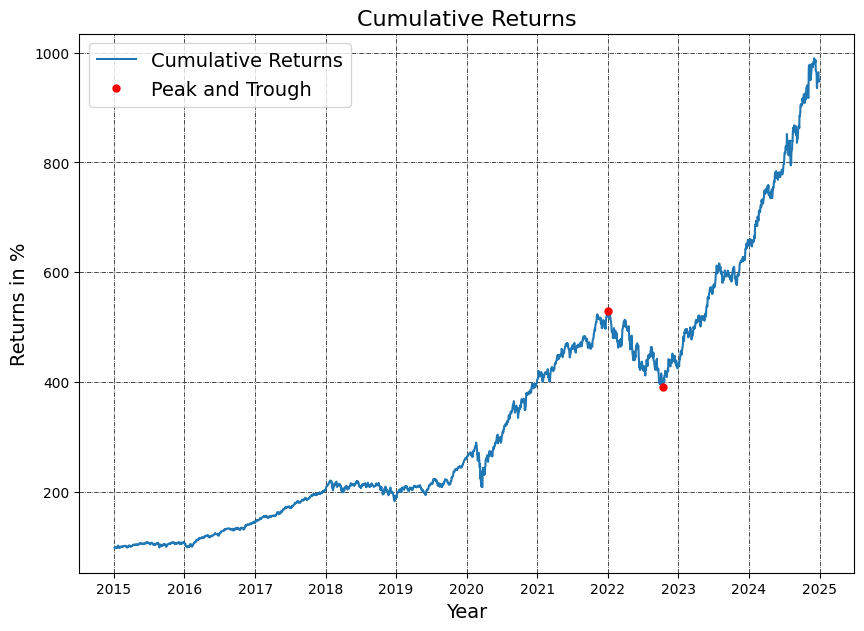

In [3]:
plot_cumulative_returns(portfolio_returns)

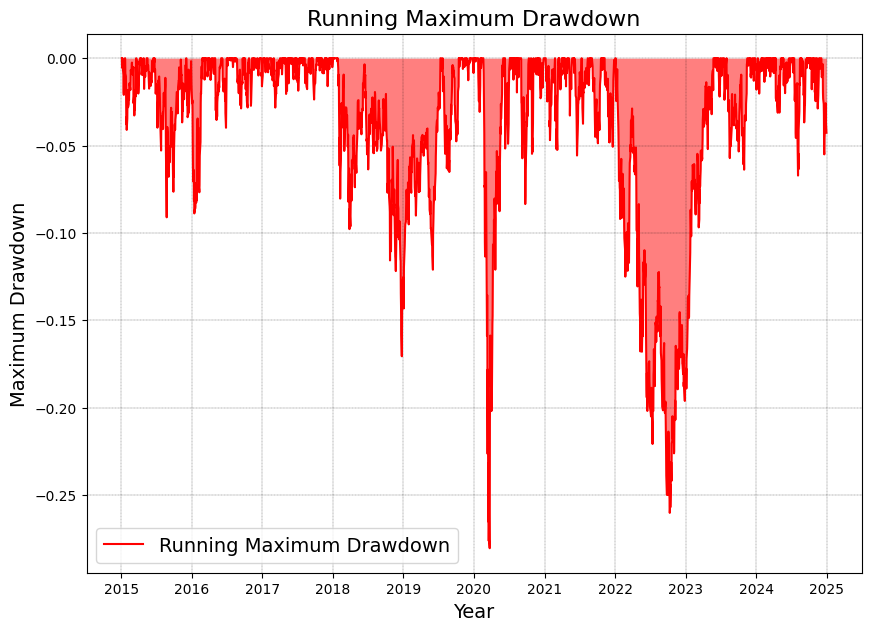

In [4]:
plot_running_maximum_drawdown(portfolio_returns)

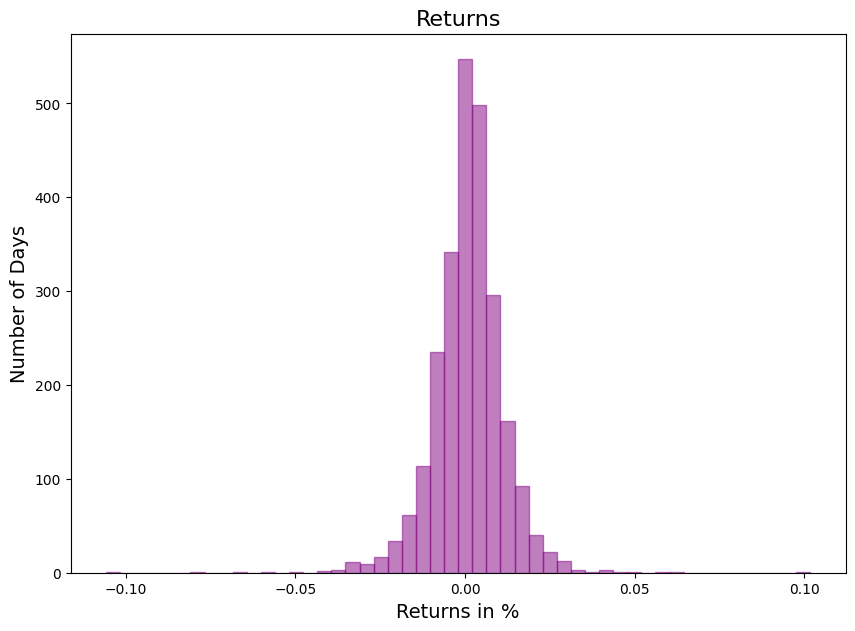

In [5]:
plot_returns_histogram(portfolio_returns)

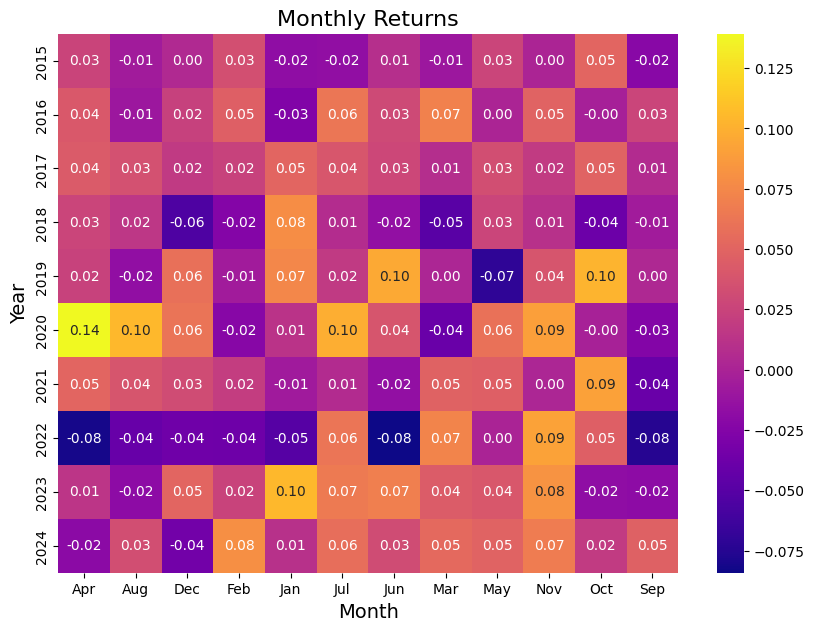

In [6]:
plot_monthly_heatmap(portfolio_returns)

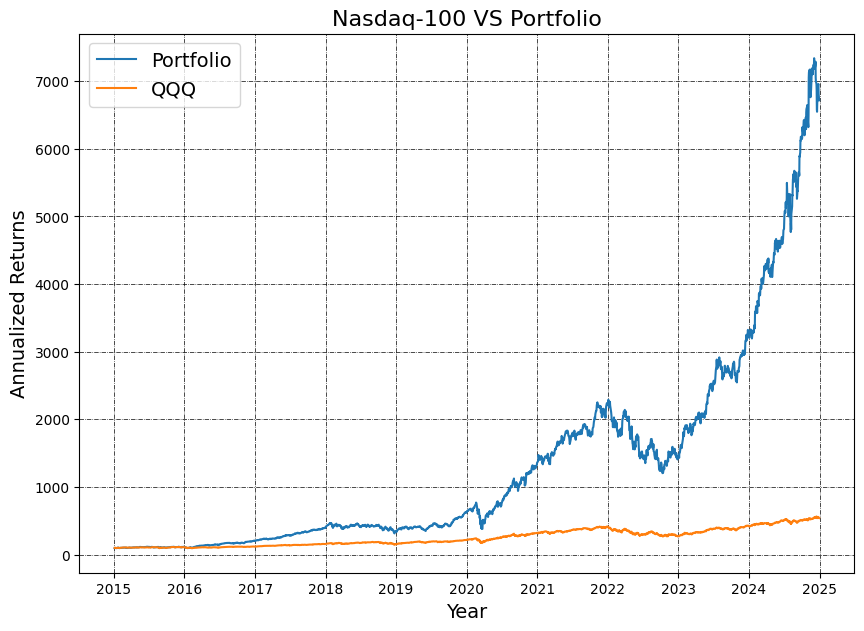

In [7]:
plot_portfolio_vs_benchmark(portfolio_returns, market_returns)